# Exercise 3<br> Multi-class Classification and Neural Networks

In [22]:
import scipy.io
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as spo
import pickle

# Load mat data

In [2]:
data = scipy.io.loadmat("ex3data1.mat")
weights = scipy.io.loadmat("ex3weights.mat")

In [3]:
X = data['X']
y = data['y']
numLabels = 10

m = X.shape[0]  # get sample num

In [4]:
rand_indices = np.random.permutation(list(range(m)))
sel = X[rand_indices[0:100], :]

# Visualize Data

In [5]:
# Be careful... Taking much time in this way
def displayData_slow(X):
    
    
    m, n = X.shape
    
    example_width = int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)
    
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    
    for i in range(m):
        
        plt.subplot(display_rows, display_cols, i+1)
        plt.tick_params(labelleft='off')
        plt.tick_params(labelbottom='off')
        
        plt.imshow(X[i].reshape(example_height, example_width).T, cmap='gray')
    
    plt.show()

In [6]:
# Faster
def displayData(X):
    
    
    m, n = X.shape
    
    example_width = int(np.round(np.sqrt(n)))
    example_height = int(n / example_width)
    
    display_rows = int(np.floor(np.sqrt(m)))
    display_cols = int(np.ceil(m / display_rows))
    
    displayX = np.zeros((display_cols*example_height, display_rows*example_width))
    for i in range(display_cols):
        for j in range(display_rows):
            displayX[example_height*i : example_height*i+example_height, example_width*j:example_width*j+example_width] = X[i*10+j].reshape(example_height, example_width).T 

    
    plt.tick_params(labelleft='off')
    plt.tick_params(labelbottom='off')    
    plt.imshow(displayX, cmap='gray')
    
    plt.show()

### Slower way to display data 

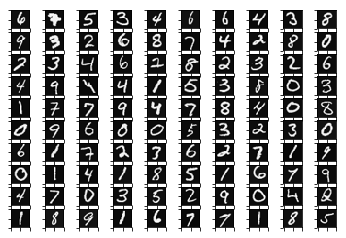

CPU times: user 13.9 s, sys: 314 ms, total: 14.2 s
Wall time: 15.9 s


In [7]:
%%time
displayData_slow(sel)

### Faster way to display data

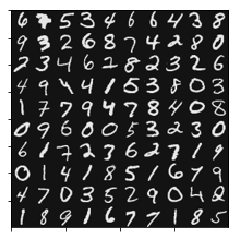

CPU times: user 233 ms, sys: 8.32 ms, total: 242 ms
Wall time: 250 ms


In [8]:
%%time
displayData(sel)

# Logistic Regression Cost Function

In [9]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

In [10]:
def lrCostFunction(theta, X, y, lamd):
    
    m = len(y)
    
    J = 0
    grad = np.zeros(theta.shape)
    
    J = (-y.T.dot(np.log(sigmoid(X.dot(theta))))-(1-y).T.dot(np.log(1-sigmoid(X.dot(theta)))) ) / m

    J = J + lamd  * sum(theta[1:]**2) / (2*m)
    
    grad = X.transpose().dot(sigmoid(X.dot(theta)) - y) / m
    
    tmp = theta.copy()
    tmp[0] = 0
    
    grad = grad + (lamd / m) * tmp
    
    return J #, grad

In [11]:
theta_t = np.array([-2, -1, 1, 2]).T
X_t = np.hstack( (np.ones((5,1)), np.array(range(1,16)).reshape(5, 3, order='F')/10 ))
y_t = ( np.array([1, 0, 1, 0, 1]).T >= 0.5 ).astype(float)
lambda_t = 3

J = lrCostFunction(theta_t, X_t, y_t, lambda_t)

### [memo]<br><br> In numpy, arr\*\*2 is faster than other ways? <br><br>http://stackoverflow.com/questions/25870923/how-to-square-or-raise-to-a-power-elementwise-a-2d-numpy-array

In [12]:
%timeit X**2

100 loops, best of 3: 7.8 ms per loop


In [13]:
%timeit X*X

100 loops, best of 3: 8.3 ms per loop


In [14]:
%timeit np.square(X)

100 loops, best of 3: 7.71 ms per loop


In [15]:
def lrCostFunctionJ(theta, X, y, lamd):
    J, grad = lrCostFunction(theta, X, y, lamd)
    return J

# One-vs-all Training

In [20]:
def oneVsAll(X, y, numLabels, lamd):
    m, n = X.shape
    allTheta = []
    
    X = np.append(np.ones((m,1)), X, 1)

    initialTheta = np.zeros((n+1, 1))
    
    for i in range(numLabels):
        allTheta.append(spo.minimize(lrCostFunction, x0=initialTheta, args=(X, (y==i).astype(float).flatten(), lamd),
                                     method = 'BFGS', options={'disp': True}))
        
    return allTheta

### This require some pc power... My mac book air screamed...

In [21]:
lamd=0.1
optTheta = oneVsAll(X, y, numLabels, lamd)

Optimization terminated successfully.
         Current function value: 0.000122
         Iterations: 24
         Function evaluations: 11284
         Gradient evaluations: 28
Optimization terminated successfully.
         Current function value: 0.013128
         Iterations: 287
         Function evaluations: 116870
         Gradient evaluations: 290
Optimization terminated successfully.
         Current function value: 0.050810
         Iterations: 440
         Function evaluations: 178126
         Gradient evaluations: 442
Optimization terminated successfully.
         Current function value: 0.057608
         Iterations: 448
         Function evaluations: 181350
         Gradient evaluations: 450
Optimization terminated successfully.
         Current function value: 0.033080
         Iterations: 382
         Function evaluations: 155961
         Gradient evaluations: 387
Optimization terminated successfully.
         Current function value: 0.054466
         Iterations: 434
        

In [28]:
with open("optTheta.pickle", mode='wb') as f:
    pickle.dump(optTheta, f)

In [32]:
optTheta[0]['x']

array([ -1.86971385e+00,  -1.25923017e-09,  -1.25923017e-09,
        -1.85884425e-07,   2.19756910e-06,   6.76551931e-07,
         5.11318526e-06,  -1.22703434e-04,  -1.20541858e-03,
        -1.33402468e-03,  -3.94905411e-04,   4.17279307e-05,
         6.72426349e-06,   6.36475035e-06,   3.50544398e-05,
         5.12241923e-05,   1.21162750e-05,   3.03030022e-06,
         6.55867272e-08,  -2.68975677e-08,  -1.25923017e-09,
        -2.50066342e-08,  -8.48384362e-08,   4.09750284e-06,
        -1.39866197e-05,   4.12890374e-05,   2.40979613e-05,
        -2.61599151e-03,  -7.11952873e-03,  -6.48259964e-03,
        -2.72541841e-03,   3.30072842e-04,   3.03440837e-04,
         1.07969258e-04,  -1.81558187e-04,  -3.50693416e-04,
         1.72905326e-05,   3.57688399e-05,   1.93781740e-05,
         3.11571683e-06,   1.23899837e-06,   1.13979056e-07,
         7.69961705e-07,  -7.75078905e-06,  -8.51781187e-05,
        -2.79804237e-04,  -3.38305084e-03,  -1.02720627e-02,
        -1.92956341e-02,